<a href="https://colab.research.google.com/github/revati2013/data_science/blob/main/Used_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
%matplotlib inline

In [26]:
train_dt=pd.read_csv('train.csv')
test_dt=pd.read_csv('test.csv')
train_dt

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


In [27]:
test_dt

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,GMC,Yukon Denali,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes
36180,90453,Toyota,Corolla LE,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Beige,Gray,None reported,Yes
36181,90454,Lincoln,Navigator Reserve,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Orange,None reported,Yes


In [28]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [29]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [30]:
train_dt.dropna()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


In [31]:
train_dt.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [32]:
test_dt.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

<Axes: xlabel='fuel_type', ylabel='count'>

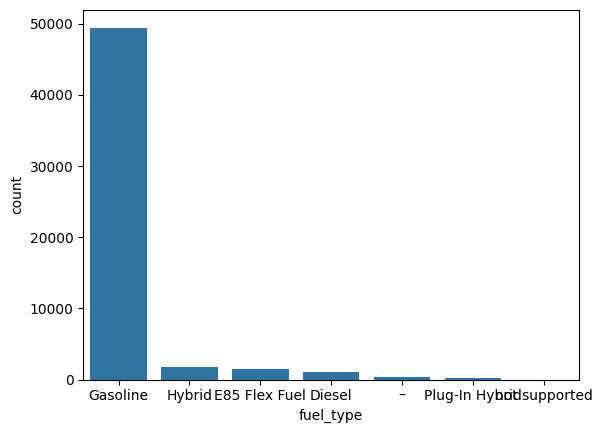

In [33]:
sns.countplot(data=train_dt,x='fuel_type')

<Axes: xlabel='fuel_type', ylabel='count'>

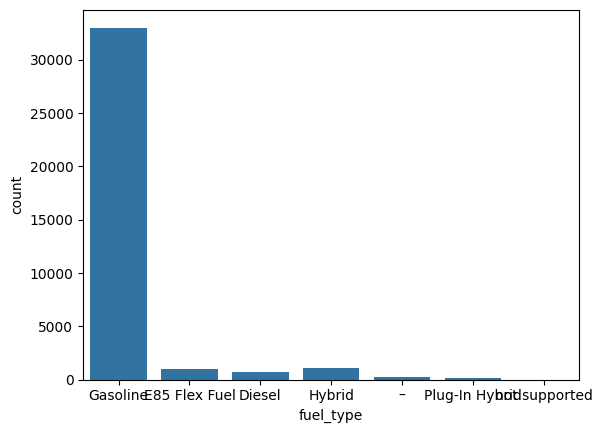

In [34]:
sns.countplot(data=test_dt,x='fuel_type')

In [35]:
#Removing '-' and 'not supported' rows
values_to_remove = ['–', 'not supported']
tdata = train_dt[train_dt['fuel_type'].isin(values_to_remove) == False]
tdata.fuel_type.value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Plug-In Hybrid      182
Name: count, dtype: int64

In [36]:
#Removing '-' and 'not supported' rows
values_to_remove = ['–', 'not supported']
tdata2 = test_dt[test_dt['fuel_type'].isin(values_to_remove) == False]
tdata.fuel_type.value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Plug-In Hybrid      182
Name: count, dtype: int64

<Axes: xlabel='fuel_type', ylabel='count'>

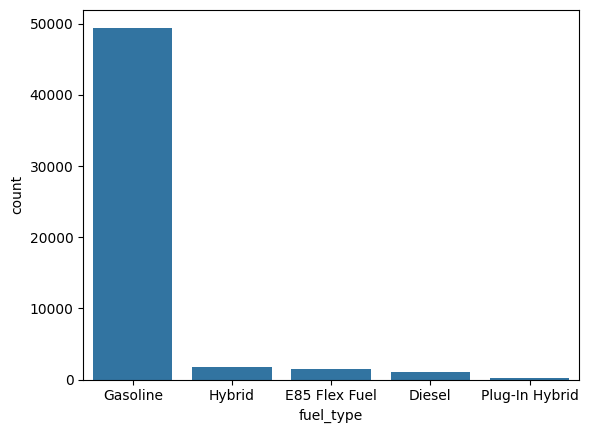

In [37]:
 sns.countplot(data=tdata,x='fuel_type')

<Axes: xlabel='fuel_type', ylabel='count'>

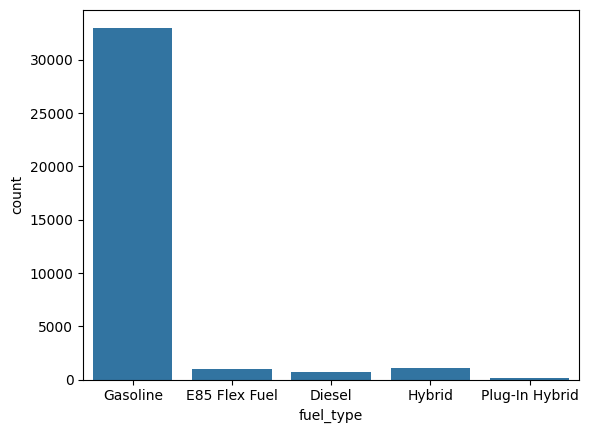

In [38]:
sns.countplot(data=tdata2,x='fuel_type')

In [39]:
tdata.accident.value_counts()

accident
None reported                             39672
At least 1 accident or damage reported    14303
Name: count, dtype: int64

In [40]:
tdata2.accident.value_counts()

accident
None reported                             26453
At least 1 accident or damage reported     9529
Name: count, dtype: int64

In [41]:
# converting values to integers
tdata['accident'] = tdata['accident'].apply(lambda x:1 if x == 'At least 1 accident or damage reported' else 0)

tdata.accident.value_counts()

<ipython-input-41-c71d6d282ecd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['accident'] = tdata['accident'].apply(lambda x:1 if x == 'At least 1 accident or damage reported' else 0)


accident
0    39672
1    14303
Name: count, dtype: int64

In [42]:
# converting values to integers
tdata2['accident'] = tdata2['accident'].apply(lambda x:1 if x == 'At least 1 accident or damage reported' else 0)

tdata.accident.value_counts()

<ipython-input-42-6a24945e7914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata2['accident'] = tdata2['accident'].apply(lambda x:1 if x == 'At least 1 accident or damage reported' else 0)


accident
0    39672
1    14303
Name: count, dtype: int64

<Axes: xlabel='accident', ylabel='count'>

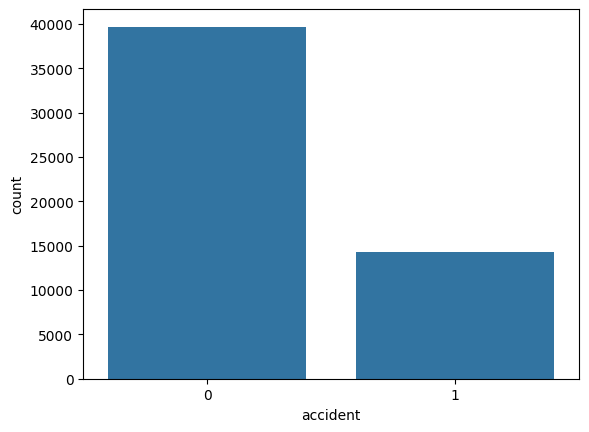

In [43]:
sns.countplot(data=tdata,x='accident')

<Axes: xlabel='accident', ylabel='count'>

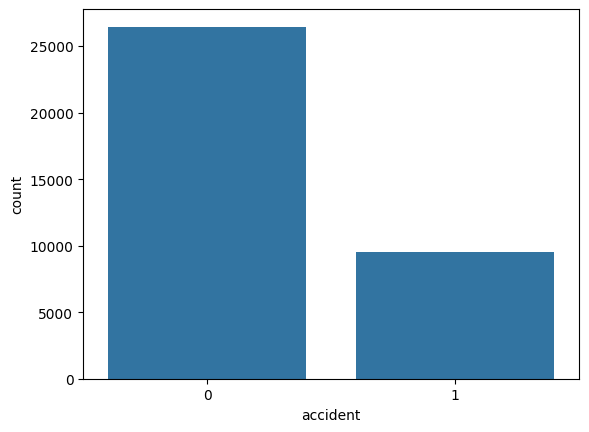

In [44]:
sns.countplot(data=tdata2,x='accident')

In [45]:
# dropping cars from any year after 2023
tdata = tdata[tdata['model_year'] <= 2023]

In [46]:
tdata.model_year.value_counts()

model_year
2018    4881
2016    4668
2017    4023
2020    4010
2019    4002
2021    3778
2015    3711
2022    3139
2014    2938
2013    2444
2011    2101
2012    2094
2023    1791
2008    1731
2007    1583
2010    1491
2009     980
2005     966
2006     865
2004     745
2003     557
2001     459
2002     390
1999     175
2000     149
1998     116
1997      78
1996      46
1993       8
1995       7
1994       4
1992       3
Name: count, dtype: int64

<Axes: xlabel='accident', ylabel='price'>

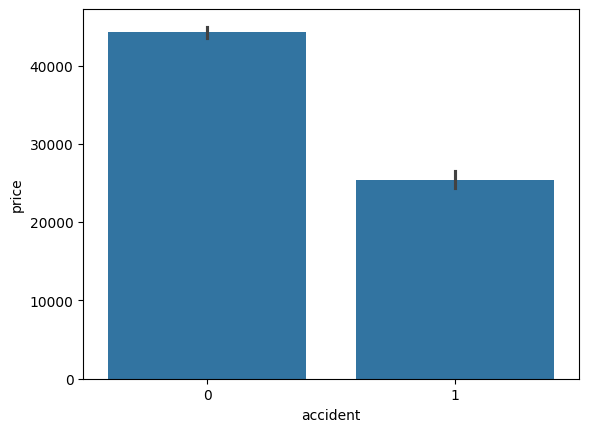

In [47]:
sns.barplot(data = tdata, x = 'accident', y = 'price')

<BarContainer object of 53933 artists>

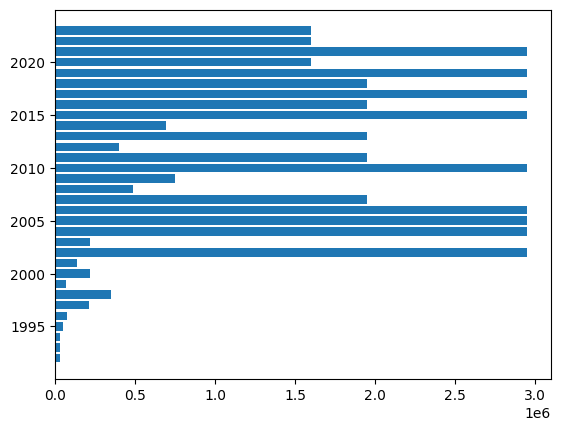

In [48]:
plt.barh(tdata['model_year'],tdata['price'])

<BarContainer object of 53933 artists>

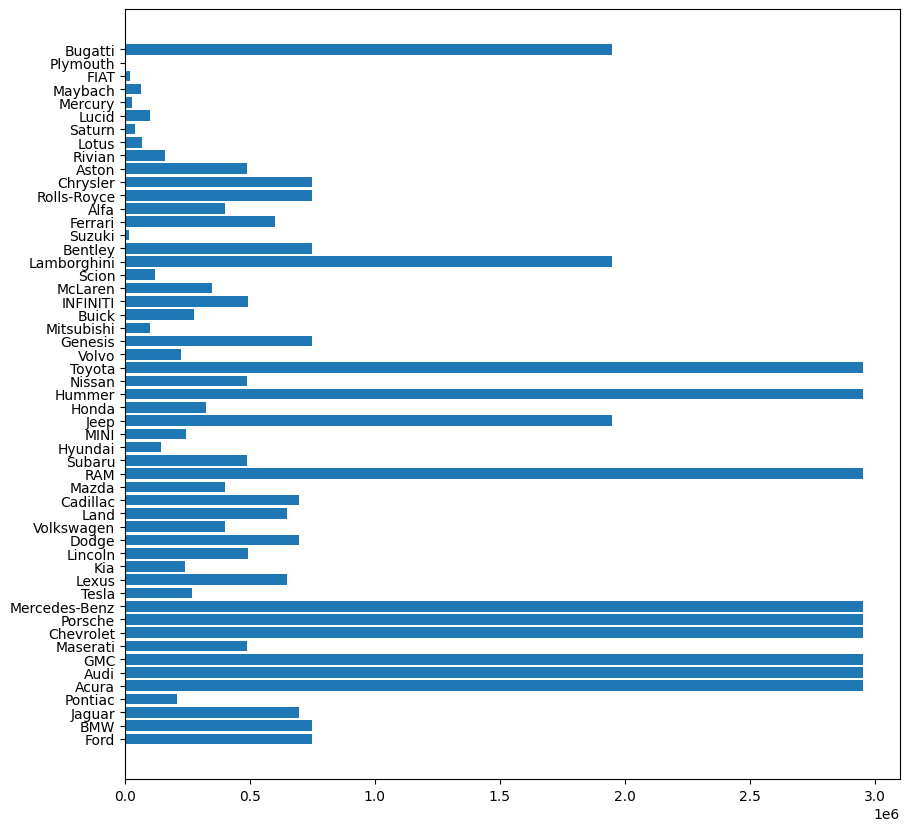

In [49]:
plt.figure(figsize = (10, 10))
plt.barh(tdata['brand'], tdata['price'])

<Axes: xlabel='milage', ylabel='price'>

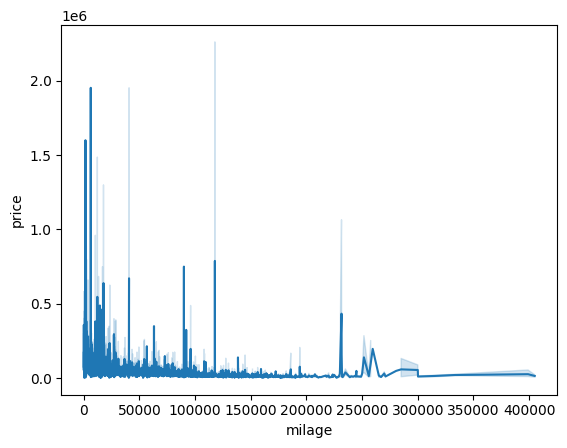

In [50]:
sns.lineplot(data = tdata, x = 'milage', y = 'price')

<Axes: xlabel='price'>

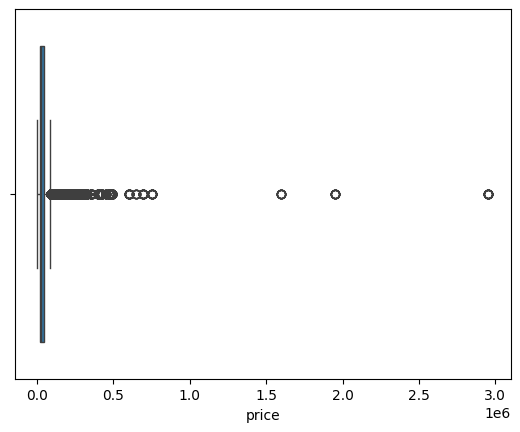

In [51]:
#removing outliers
sns.boxplot(data = tdata, x = 'price')

In [52]:
#IQR
#getting 25th and 75th percentile
Q1 = tdata['price'].quantile(0.25)
Q3 = tdata['price'].quantile(0.75)
# get the interquartile range
IQR = Q3 - Q1
# get the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [53]:
IQR

29250.0

In [54]:
print(upper_bound,lower_bound)

88875.0 -28125.0


In [55]:
tdata[(tdata['price'] > upper_bound) | (tdata['price'] < lower_bound)].shape[0]

3130

In [56]:
tdata = tdata[(tdata['price'] < upper_bound) & (tdata['price'] > lower_bound)]

<Axes: xlabel='price'>

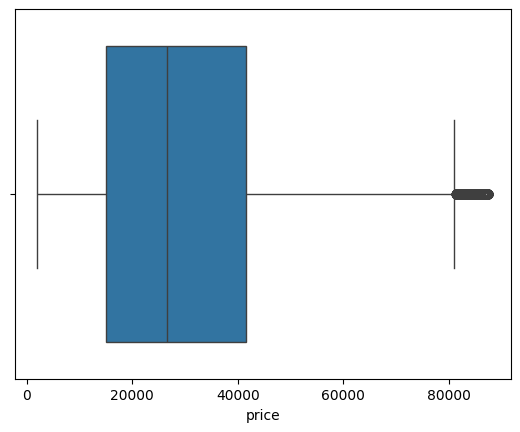

In [57]:
sns.boxplot(data = tdata, x='price')

Removing outlier again

In [68]:
#IQR
#getting 25th and 75th percentile
Q1 = tdata['price'].quantile(0.25)
Q3 = tdata['price'].quantile(0.75)
# get the interquartile range
IQR = Q3 - Q1
# get the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [69]:
IQR

24900.0

In [70]:
print(upper_bound,lower_bound)

77250.0 -22350.0


In [71]:
tdata[(tdata['price'] > upper_bound) | (tdata['price'] < lower_bound)].shape[0]

12

In [72]:
tdata = tdata[(tdata['price'] < upper_bound) & (tdata['price'] > lower_bound)]

<Axes: xlabel='price'>

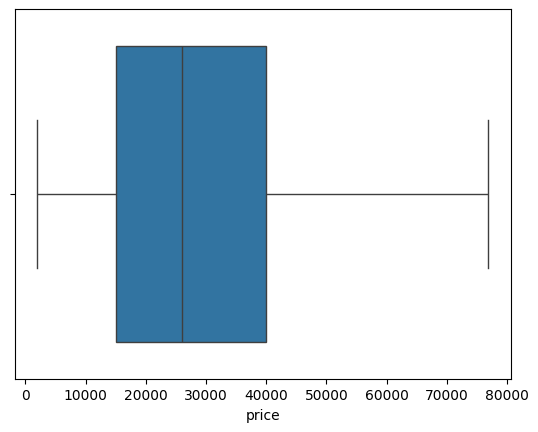

In [73]:
sns.boxplot(data = tdata, x='price')

visualization after removing outlier

<Axes: xlabel='accident', ylabel='price'>

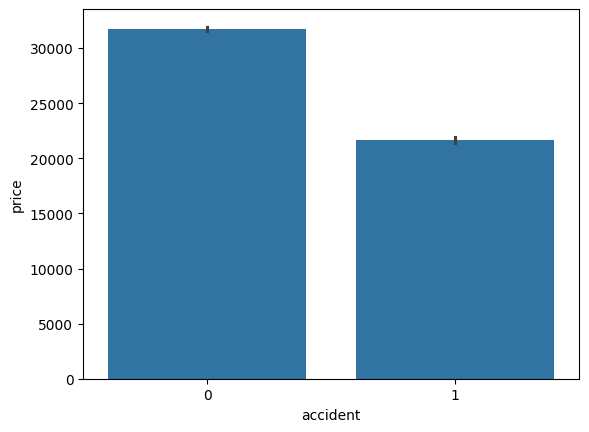

In [74]:
sns.barplot(data = tdata, x = 'accident', y = 'price')

<BarContainer object of 49565 artists>

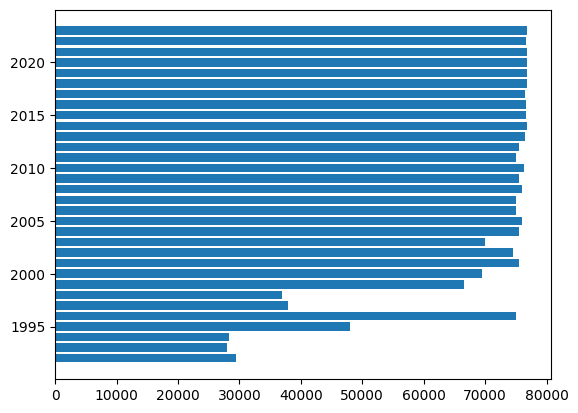

In [75]:
plt.barh(tdata['model_year'], tdata['price'])

<BarContainer object of 49565 artists>

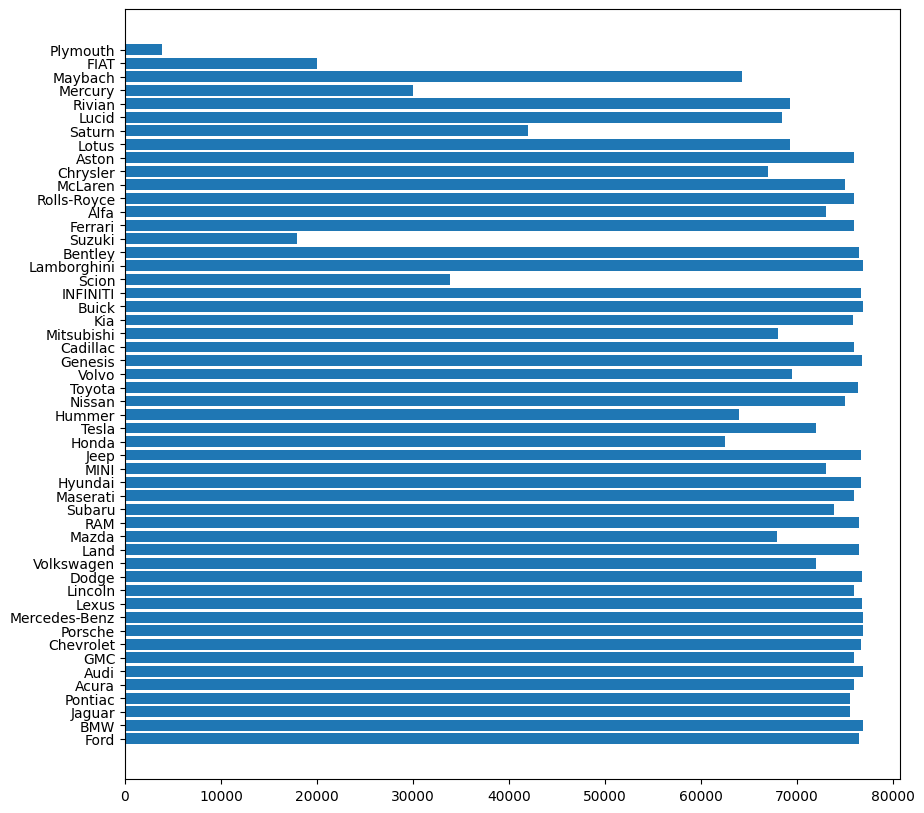

In [76]:
plt.figure(figsize = (10, 10))
plt.barh(tdata['brand'], tdata['price'])

<Axes: xlabel='milage', ylabel='price'>

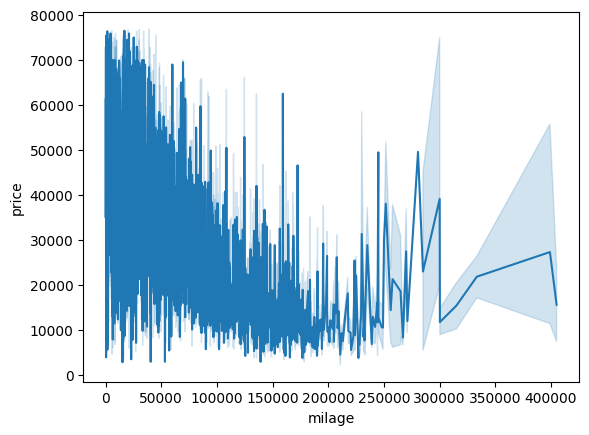

In [77]:
sns.lineplot(data = tdata, x = 'milage', y = 'price')

<Axes: xlabel='fuel_type', ylabel='price'>

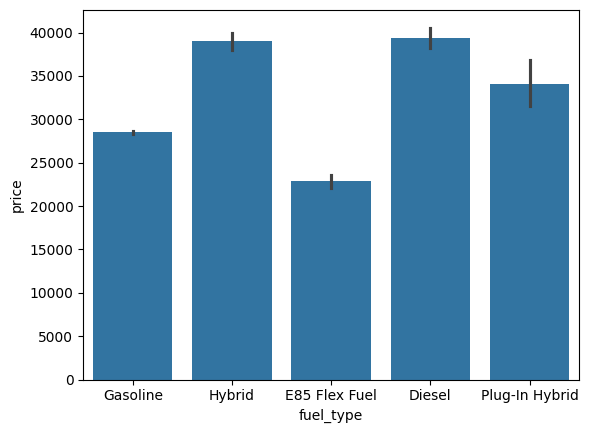

In [78]:
sns.barplot(data = tdata, x = 'fuel_type', y = 'price')

In [79]:
tdata['clean_title'].replace(['Yes'],[1],inplace = True)

In [80]:
tdata2['clean_title'].replace(['Yes','No'],[1,0],inplace = True)

<ipython-input-80-a55c73b24a52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata2['clean_title'].replace(['Yes','No'],[1,0],inplace = True)


In [81]:
tdata2['clean_title'].info()

<class 'pandas.core.series.Series'>
Index: 35982 entries, 0 to 36182
Series name: clean_title
Non-Null Count  Dtype
--------------  -----
35982 non-null  int64
dtypes: int64(1)
memory usage: 562.2 KB


In [82]:
tdata['clean_title'].info()

<class 'pandas.core.series.Series'>
Index: 49565 entries, 0 to 54272
Series name: clean_title
Non-Null Count  Dtype
--------------  -----
49565 non-null  int64
dtypes: int64(1)
memory usage: 774.5 KB


In [83]:
num_col=['id','model_year','milage','accident','clean_title','price']
cat_cols=['brand','model','fuel_type','engine','transmission','ext_col','int_col']

1) Transforming categorical columns values into integer values

In [84]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [85]:
le=preprocessing.LabelEncoder()
tdata[cat_cols]=tdata[cat_cols].apply(le.fit_transform)

In [86]:
le=preprocessing.LabelEncoder()
tdata2[cat_cols] = tdata2[cat_cols].apply(le.fit_transform)

<ipython-input-86-c77d2ba8a8f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata2[cat_cols] = tdata2[cat_cols].apply(le.fit_transform)


In [87]:
tdata.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,13,637,2018,74349,2,713,2,24,55,0,1,11000
1,1,4,47,2007,80000,2,528,18,15,9,0,1,8250
2,2,20,1744,2009,91491,2,535,14,170,6,0,1,15000
3,3,4,1721,2022,2437,3,640,43,92,23,0,1,63500
4,4,39,685,2001,111000,2,216,34,238,9,0,1,7850


In [88]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49565 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            49565 non-null  int64
 1   brand         49565 non-null  int64
 2   model         49565 non-null  int64
 3   model_year    49565 non-null  int64
 4   milage        49565 non-null  int64
 5   fuel_type     49565 non-null  int64
 6   engine        49565 non-null  int64
 7   transmission  49565 non-null  int64
 8   ext_col       49565 non-null  int64
 9   int_col       49565 non-null  int64
 10  accident      49565 non-null  int64
 11  clean_title   49565 non-null  int64
 12  price         49565 non-null  int64
dtypes: int64(13)
memory usage: 5.3 MB


In [89]:
tdata2.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,34,522,2014,73000,2,542,33,219,8,0,1
1,54274,26,1236,2015,128032,2,408,26,186,10,0,1
2,54275,34,314,2015,51983,2,309,20,26,107,0,1


In [90]:
#scaling numerical data

norm = StandardScaler()
tdata['price'] = np.log(tdata['price'])
tdata['model_year'] = norm.fit_transform(np.array(tdata['model_year']).reshape(-1,1))
tdata['model'] = norm.fit_transform(np.array(tdata['model']).reshape(-1,1))

#scaling target variable
q1,q3=(tdata['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
tdata=tdata[(tdata.price>=o1) & (tdata.price<=o2)]

In [91]:
#scaling numerical data

norm = StandardScaler()
tdata2['model_year'] = norm.fit_transform(np.array(tdata2['model_year']).reshape(-1,1))
tdata2['model'] = norm.fit_transform(np.array(tdata2['model']).reshape(-1,1))


<ipython-input-91-6284b4addc76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata2['model_year'] = norm.fit_transform(np.array(tdata2['model_year']).reshape(-1,1))
<ipython-input-91-6284b4addc76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata2['model'] = norm.fit_transform(np.array(tdata2['model']).reshape(-1,1))


In [92]:
tdata.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,13,-0.469127,0.594922,74349,2,713,2,24,55,0,1,9.305651
1,1,4,-1.575230,-1.433054,80000,2,528,18,15,9,0,1,9.017968
2,2,20,1.606224,-1.064331,91491,2,535,14,170,6,0,1,9.615805


In [93]:
tdata2.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,34,-0.660713,-0.202987,73000,2,542,33,219,8,0,1
1,54274,26,0.690483,-0.021335,128032,2,408,26,186,10,0,1
2,54275,34,-1.054338,-0.021335,51983,2,309,20,26,107,0,1


In [97]:
from sklearn.ensemble import RandomForestRegressor

y = tdata['price']

features = ['id','brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']
X = pd.get_dummies(tdata[features])
X_test = pd.get_dummies(tdata2[features])
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [99]:
output = pd.DataFrame({'id': tdata2.id, 'price': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [100]:
pd.read_csv('submission.csv')

,id,price
0,54273,9.886813
1,54274,9.813967
2,54275,10.179958
3,54276,10.735098
4,54277,10.437190
...,...,...
35977,90451,10.674783
35978,90452,9.041645
35979,90453,9.234421
35980,90454,10.712869
